In [1]:
%matplotlib notebook
import os
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import trackpy as tp
import utils
import analysis
from openpyxl import load_workbook

TRACKS_DIR = '/Users/magdalenemichael/Documents/Kindlin/Imaging/Analysis/Endocytic markers/EGFRGFP, Rab11 cherry, lysotracker deep red movies 30min 10ngmL EGF/for vesicle tracking/EGFR red = channel 1/'
TRACKS_PATH = TRACKS_DIR + 'KS 1_channels_10_obcol.xlsx'
NUCLEUS_PATH = TRACKS_DIR + 'Results from KS 1 in µm per sec.csv'

In [2]:
batch1_path = '/Users/magdalenemichael/Documents/Kindlin/Imaging/Analysis/Endocytic markers/EGFRGFP, Rab11 cherry, lysotracker deep red movies 30min 10ngmL EGF/for vesicle tracking/'
batch2_path = '/Users/magdalenemichael/Documents/Kindlin/Imaging/Analysis/Endocytic markers/EGFRGFP, Rab11 cherry, lysotracker deep red movies 30min 10ngmL EGF/for vesicle tracking/EGFR red = channel 1/'
batch3_path = '/Users/magdalenemichael/Documents/Kindlin/Imaging/Analysis/Endocytic markers/EGFRGFP, Rab11 cherry, lysotracker deep red movies 30min 10ngmL EGF/redo/'

In [ ]:
# this is for reorganising messed up tracks
import pandas as pd
for filename in os.listdir(TRACKS_DIR):
    if filename.endswith(".xlsx"):
        print(filename)
        tracks_path = os.path.join(TRACKS_DIR, filename)
        book = load_workbook(tracks_path)
        writer = pd.ExcelWriter(tracks_path, engine='openpyxl')
        writer.book = book
        writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

        columns = ['x', 'y', 'frame', 'patch id', 'particle']
        chans = ['red', 'green']
        data_dict = {}
        for chan in chans:
            input_data = pd.read_excel(tracks_path, sheetname="{} tracks".format(chan))
            data = []
            for d in input_data.iterrows():
                data.append(d[1].values[0])

            data_frames = []
            for d in data:
                rows = []
                d_str = d.split('\n')
                for ds in d_str[2:]:
                    try:
                        rows.append([float(val) for val in ds.split()[1:]])
                    except ValueError:
                        pass
                ds_df = pd.DataFrame(rows)
                ds_df.columns = columns
                data_frames.append(ds_df)

            tracks_df = pd.concat(data_frames)
            tracks_df.to_excel(writer, sheet_name="{} tracks".format(chan))

        writer.save()

In [ ]:
batch1_path = '/Users/magdalenemichael/Documents/Kindlin/Imaging/Analysis/Endocytic markers/EGFRGFP, Rab11 cherry, lysotracker deep red movies 30min 10ngmL EGF/for vesicle tracking/'
processed_batch1 = analysis.batch_distance_to_reference(batch1_path)

batch2_path = '/Users/magdalenemichael/Documents/Kindlin/Imaging/Analysis/Endocytic markers/EGFRGFP, Rab11 cherry, lysotracker deep red movies 30min 10ngmL EGF/for vesicle tracking/EGFR red = channel 1/'
processed_batch2 = analysis.batch_distance_to_reference(batch2_path)

In [ ]:
batch1_path = '/Users/magdalenemichael/Documents/Kindlin/Imaging/Analysis/Endocytic markers/EGFRGFP, Rab11 cherry, lysotracker deep red movies 30min 10ngmL EGF/for vesicle tracking/'
batch2_path = '/Users/magdalenemichael/Documents/Kindlin/Imaging/Analysis/Endocytic markers/EGFRGFP, Rab11 cherry, lysotracker deep red movies 30min 10ngmL EGF/for vesicle tracking/EGFR red = channel 1/'

tracks_batch1 = analysis.batch_motion(batch1_path, mpp=0.207, fps=0.0333, sheetname='motion')
tracks_batch2 = analysis.batch_motion(batch2_path, mpp=0.207, fps=0.0333, sheetname='motion')

In [3]:
batch3_path = '/Users/magdalenemichael/Documents/Kindlin/Imaging/Analysis/Endocytic markers/EGFRGFP, Rab11 cherry, lysotracker deep red movies 30min 10ngmL EGF/redo/'
tracks_batch3 = analysis.batch_motion(batch3_path, mpp=0.207, fps=0.0333, sheetname='motion')

Frame 60: 68 trajectories present


In [ ]:
# distance and speed analysis starts here
ks_track_distance_01 = analysis.mean_motion_per_image(batch1_path, 'KS', 'track distance', 'motion')

In [5]:
# KS batch 1 mean track distance
print "ks track distance batch 01"
print " "
for k, v in ks_track_distance_01.iteritems():
    print(k)
    for kv, vv in v.iteritems():
        print kv, ' ', vv 

ks track distance batch 01
 
KS 5_channels_10_obcol.xlsx
green   7.63008009968
red   6.66631217117
KS 6_channels_10_obcol.xlsx
green   6.50040303033
red   7.16624889272
KS 7_channels_10_obcol.xlsx
green   5.63270669764
red   6.02762856086
KS 2_channels_10_obcol.xlsx
green   5.94011050852
red   6.31809104415


In [ ]:
wt_track_distance_01 = analysis.mean_motion_per_image(batch1_path, 'WT', 'track distance', 'motion')

In [7]:
# WT batch 1 mean track distance
print "wt track distance batch 01"
print " "
for k, v in wt_track_distance_01.iteritems():
    print(k)
    for kv, vv in v.iteritems():
        print kv, ' ', vv 


wt track distance batch 01
 
WT 9_channels_10_obcol.xlsx
green   6.23287279685
red   7.23163378769
WT 5_channels_10_obcol.xlsx
green   6.8719099148
red   6.42195466806
WT 10_channels_10_obcol.xlsx
green   6.76642602427
red   6.68429153749
WT 2_channels_10_obcol.xlsx
green   6.33811855579
red   6.8116918806
WT 1_channels_10_obcol.xlsx
green   6.30810066227
red   7.63756837303
WT 3_channels_10_obcol.xlsx
green   6.49896120481
red   6.60571960562
WT 12_channels_10_obcol.xlsx
green   7.1609194839
red   6.78367096529
WT 8_channels_10_obcol.xlsx
green   7.42027188958
red   6.45008337979
WT 6_channels_10_obcol.xlsx
green   5.92116956991
red   6.4496281153
WT 11_channels_10_obcol.xlsx
green   7.04075768132
red   5.89183606348
WT 4_channels_10_obcol.xlsx
green   5.66371481505
red   6.98384477618
WT 7_channels_10_obcol.xlsx
green   5.26400710157
red   6.59689471344


In [ ]:
ks_track_distance_02 = analysis.mean_motion_per_image(batch2_path, 'KS', 'track distance', 'motion')

In [9]:
# KS batch 2 mean track distance
print "ks track distance batch 02"
print " "
for k, v in ks_track_distance_02.iteritems():
    print(k)
    for kv, vv in v.iteritems():
        print kv, ' ', vv 


ks track distance batch 02
 
KS11_channels_10_obcol.xlsx
green   6.96534291066
red   6.64911993855
KS 8_channels_10_obcol.xlsx
green   6.05768956203
red   5.61406145968
KS16_channels_10_obcol.xlsx
green   5.69517799592
red   6.17047837339
KS15_channels_10_obcol.xlsx
green   6.78046055705
red   6.04309666697
KS17_channels_10_obcol.xlsx
green   6.28131621533
red   5.99088850446
KS12_channels_10_obcol.xlsx
green   7.73416057698
red   6.4728265315
KS10_channels_10_obcol.xlsx
green   6.79146138459
red   6.42207370055
KS 13_channels_10_obcol.xlsx
green   6.68756230394
red   4.28917470391
KS18_channels_10_obcol.xlsx
green   7.2161290723
red   5.97688312792
KS 9_channels_10_obcol.xlsx
green   6.29479124682
red   6.11284514311
KS 14_channels_10_obcol.xlsx
green   6.76184407451
red   7.1537691871


In [ ]:
wt_track_distance_02 = analysis.mean_motion_per_image(batch2_path, 'WT', 'track distance', 'motion')

In [11]:
# WT batch 2 mean track distance
print "wt track distance batch 02"
print " "
for k, v in wt_track_distance_02.iteritems():
    print(k)
    for kv, vv in v.iteritems():
        print kv, ' ', vv 


wt track distance batch 02
 
WT13_channels_10_obcol.xlsx
green   6.68541639678
red   6.32261010163
WT15_channels_10_obcol.xlsx
green   6.6645042808
red   6.22336430473
WT 14_channels_10_obcol.xlsx
green   6.99812287592
red   6.66754073868


In [ ]:
ks_track_distance_03 = analysis.mean_motion_per_image(batch3_path, 'KS', 'track distance', 'motion')

In [13]:
# KS batch 3 mean track distance
print "ks track distance batch 03"
print " "
for k, v in ks_track_distance_03.iteritems():
    print(k)
    for kv, vv in v.iteritems():
        print kv, ' ', vv 

ks track distance batch 03
 
KS 1_channels_10_obcol.xlsx
green   5.65950585196
red   5.68968714084


In [14]:
ks_track_speed_01 = analysis.mean_motion_per_image(batch1_path, 'KS', 'track speed', 'motion')

reading sheet red motion
reading sheet green motion
reading sheet red motion
reading sheet green motion
reading sheet red motion
reading sheet green motion
reading sheet red motion
reading sheet green motion
{'KS 5_channels_10_obcol.xlsx': {'green': 4399.2726822628101, 'red': 3722.2929113334776}, 'KS 6_channels_10_obcol.xlsx': {'green': 4045.3706317130732, 'red': 4787.5964380573705}, 'KS 7_channels_10_obcol.xlsx': {'green': 3592.3280871826437, 'red': 3511.0041380759458}, 'KS 2_channels_10_obcol.xlsx': {'green': 2540.4631642865652, 'red': 2726.123258042719}}


In [28]:
# KS batch 1 mean track speed
print "ks track speed batch 01"
print " "
for k, v in ks_track_speed_01.iteritems():
    print(k)
    for kv, vv in v.iteritems():
        print kv, ' ', vv 

ks track speed batch 01
 
KS 5_channels_10_obcol.xlsx
green   3684.30589961
red   3648.61045496
KS 6_channels_10_obcol.xlsx
green   3684.30589961
red   3648.61045496
KS 7_channels_10_obcol.xlsx
green   3684.30589961
red   3648.61045496
KS 2_channels_10_obcol.xlsx
green   3684.30589961
red   3648.61045496


In [ ]:
wt_track_speed_01 = analysis.mean_motion_per_image(batch1_path, 'WT', 'track speed', 'motion')

In [30]:
# WT batch 1 mean track speed
print "wt track speed batch 01"
print " "
for k, v in wt_track_speed_01.iteritems():
    print(k)
    for kv, vv in v.iteritems():
        print kv, ' ', vv 

wt track speed batch 01
 
WT 9_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924
WT 5_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924
WT 10_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924
WT 2_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924
WT 1_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924
WT 3_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924
WT 12_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924
WT 8_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924
WT 6_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924
WT 11_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924
WT 4_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924
WT 7_channels_10_obcol.xlsx
green   3328.66559298
red   4189.08082924


In [ ]:
ks_track_speed_02 = analysis.mean_motion_per_image(batch2_path, 'KS', 'track speed', 'motion')

In [32]:
# KS batch 2 mean track speed
print "ks track speed batch 02"
print " "
for k, v in ks_track_speed_02.iteritems():
    print(k)
    for kv, vv in v.iteritems():
        print kv, ' ', vv 

ks track speed batch 02
 
KS11_channels_10_obcol.xlsx
green   4549.32049049
red   3552.10958919
KS 8_channels_10_obcol.xlsx
green   4549.32049049
red   3552.10958919
KS16_channels_10_obcol.xlsx
green   4549.32049049
red   3552.10958919
KS15_channels_10_obcol.xlsx
green   4549.32049049
red   3552.10958919
KS17_channels_10_obcol.xlsx
green   4549.32049049
red   3552.10958919
KS12_channels_10_obcol.xlsx
green   4549.32049049
red   3552.10958919
KS10_channels_10_obcol.xlsx
green   4549.32049049
red   3552.10958919
KS 13_channels_10_obcol.xlsx
green   4549.32049049
red   3552.10958919
KS18_channels_10_obcol.xlsx
green   4549.32049049
red   3552.10958919
KS 9_channels_10_obcol.xlsx
green   4549.32049049
red   3552.10958919
KS 14_channels_10_obcol.xlsx
green   4549.32049049
red   3552.10958919


In [ ]:
wt_track_speed_02 = analysis.mean_motion_per_image(batch2_path, 'WT', 'track speed', 'motion')

In [34]:
# WT batch 2 mean track speed
print "wt track speed batch 02"
print " "
for k, v in wt_track_speed_02.iteritems():
    print(k)
    for kv, vv in v.iteritems():
        print kv, ' ', vv 

wt track speed batch 02
 
WT13_channels_10_obcol.xlsx
green   3718.49394965
red   3380.3049752
WT15_channels_10_obcol.xlsx
green   3718.49394965
red   3380.3049752
WT 14_channels_10_obcol.xlsx
green   3718.49394965
red   3380.3049752


In [35]:
ks_track_speed_03 = analysis.mean_motion_per_image(batch3_path, 'KS', 'track speed', 'motion')

reading sheet red motion
reading sheet green motion


In [36]:
# KS batch 2 mean track speed
print "ks track speed batch 03"
print " "
for k, v in ks_track_speed_03.iteritems():
    print(k)
    for kv, vv in v.iteritems():
        print kv, ' ', vv 

ks track speed batch 03
 
KS 1_channels_10_obcol.xlsx
green   2292.18698262
red   2227.42334485


In [20]:
def plot_distance(folder, channels, condition, data):
    chans = {'red': list(channels)[0], 'green': list(channels)[1]}
    for filename in os.listdir(folder):
        if filename.endswith(".xlsx"):
            if channels in filename and condition in filename:
                shortname = filename[0: filename.index('_')]
                for k, v in data[filename][0].iteritems():
                    plt.figure()
                    for pid, p in v.groupby('particle'):
                        plt.plot(p['frame'].values, p['distance'].values)
                    plt.xlabel('Frame number')
                    plt.ylabel('Distance to reference [um]')
                    title = 'All tracks in {0} channel {1}'.format(shortname, chans[k])
                    plt.title(title)
                    plt.savefig(os.path.join(TRACKS_DIR, title + '.png'))
                    plt.show()

In [32]:
def mean_slope_per_image(folder, channels, condition, data):
    mean_slopes = {}
    mean_slopes['green'] = []
    mean_slopes['red'] = []    
    for filename in os.listdir(folder):
        if filename.endswith(".xlsx"):
            if channels in filename and condition in filename:
                print(filename)
                for k in data[filename][1].iterkeys():
                    slopes = data[filename][1][k]
                    if isinstance(slopes, list):
                        mean_slopes[k].append(np.NAN)
                    else:
                        mean_slopes[k].append(slopes[slopes['good'] == True]['slope'].mean())
    return mean_slopes

In [33]:
wt_ms_20 = mean_slope_per_image(TRACKS_DIR, '20', 'WT', processed)
wt_ms_chan_0 = wt_ms_20['green']
wt_ms_chan_2 = wt_ms_20['red']

ks_ms_20 = mean_slope_per_image(TRACKS_DIR, '20', 'KS', processed)
ks_ms_chan_0 = ks_ms_20['green']
ks_ms_chan_2 = ks_ms_20['red']

WT 0-30min 4_channels_20_obcol.xlsx
WT 0-30min 3_channels_20_obcol.xlsx
WT 0-30min_channels_20_obcol.xlsx
WT 0-30min 2_channels_20_obcol.xlsx
KS 0-30min 3_channels_20_obcol.xlsx
KS 0-30min 2_channels_20_obcol.xlsx
KS 0-30min_channels_20_obcol.xlsx


In [34]:
wt_ms_10 = mean_slope_per_image(TRACKS_DIR, '10', 'WT', processed)
wt_ms_chan_1 = wt_ms_10['green']

ks_ms_10 = mean_slope_per_image(TRACKS_DIR, '10', 'KS', processed)
ks_ms_chan_1 = ks_ms_10['green']

WT 0-30min_channels_10_obcol.xlsx
WT 0-30min 4_channels_10_obcol.xlsx
WT 0-30min 3_channels_10_obcol.xlsx
WT 0-30min 2_channels_10_obcol.xlsx
KS 0-30min 3_channels_10_obcol.xlsx
KS 0-30min_channels_10_obcol.xlsx
KS 0-30min 2_channels_10_obcol.xlsx


<IPython.core.display.Javascript object>


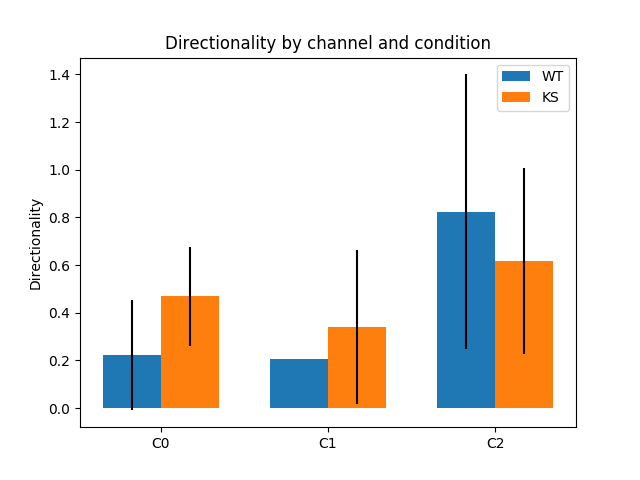

In [37]:
N = 3
wt_means = (np.nanmean(wt_ms_chan_0), np.nanmean(wt_ms_chan_1), np.nanmean(wt_ms_chan_2))
ks_means = (np.nanmean(ks_ms_chan_0), np.nanmean(ks_ms_chan_1), np.nanmean(ks_ms_chan_2))

wt_stderr = (stats.sem(wt_ms_chan_0), stats.sem(wt_ms_chan_1), stats.sem(wt_ms_chan_2))
ks_stderr = (stats.sem(ks_ms_chan_0), stats.sem(ks_ms_chan_1), stats.sem(ks_ms_chan_2))

ind = np.arange(N) 
width = 0.35
plt.figure()
plt.bar(ind, wt_means, width, label='WT', yerr=wt_stderr)
plt.bar(ind + width, ks_means, width, label='KS', yerr=ks_stderr)

plt.ylabel('Directionality')
plt.title('Directionality by channel and condition')

plt.xticks(ind + width / 2, ('C0', 'C1', 'C2'))
plt.legend(loc='best')
plt.savefig(os.path.join(TRACKS_DIR, 'directionality.png'))
plt.show()

<IPython.core.display.Javascript object>


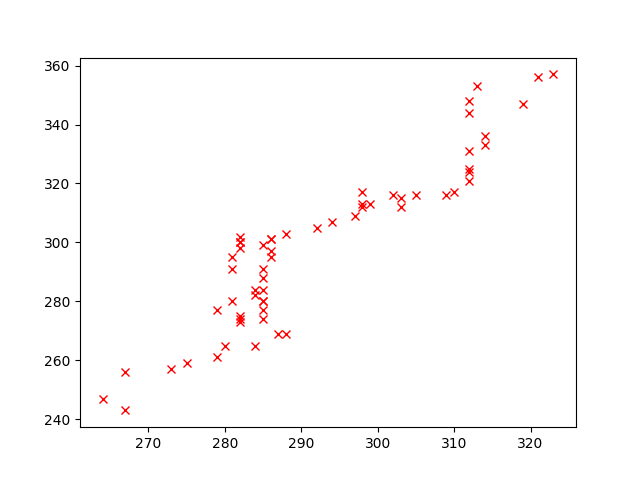

<IPython.core.display.Javascript object>


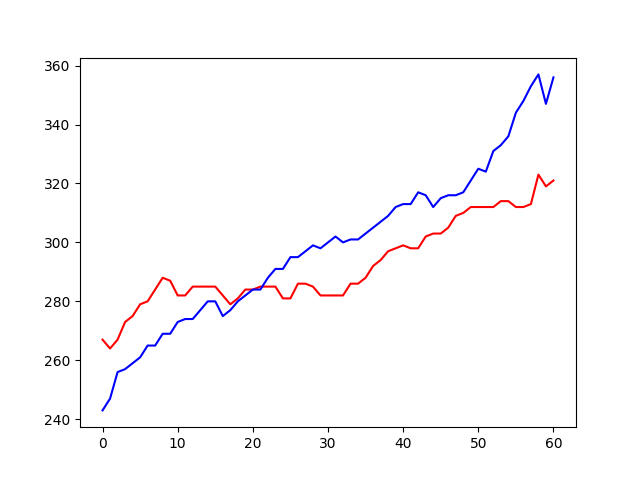

In [5]:
# plot the nucleus centroids
t = xrange(0, nucleus.shape[0])
plt.figure()
plt.plot(nucleus['x'], nucleus['y'], 'rx')
plt.show()

plt.figure()
plt.plot(t, nucleus['x'], 'r')
plt.plot(t, nucleus['y'], 'b')
plt.show()

<IPython.core.display.Javascript object>


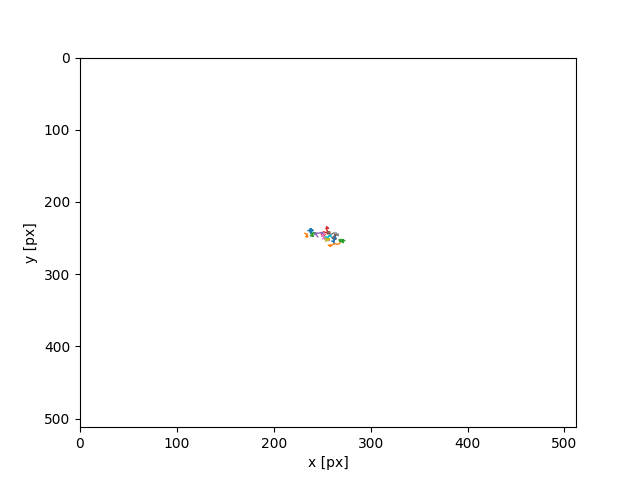

<IPython.core.display.Javascript object>


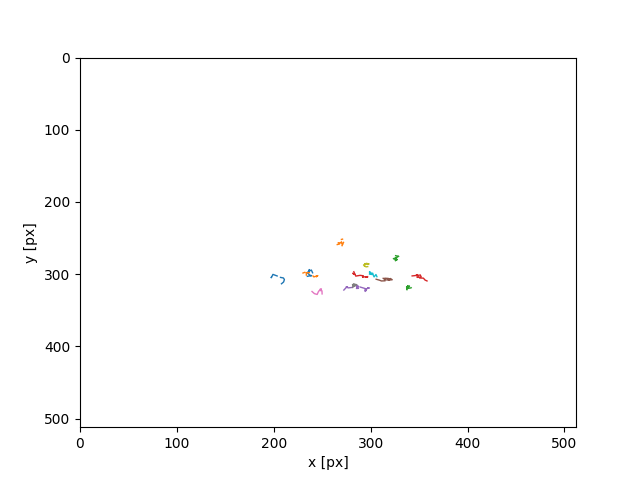

(512, 0)

In [6]:
# plot the tracks
plt.figure()
ax1 = tp.plot_traj(tracks['red'])
ax1.set_xlim([0, 512])
ax1.set_ylim([512, 0])
plt.figure()
ax2 = tp.plot_traj(tracks['green'])
ax2.set_xlim([0, 512])
ax2.set_ylim([512, 0])

<IPython.core.display.Javascript object>


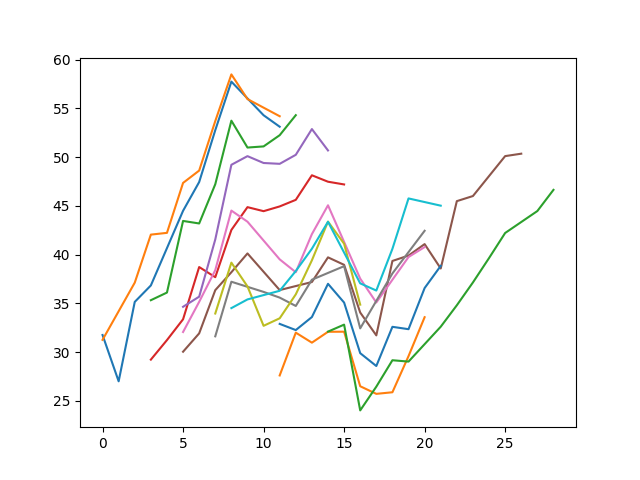

<IPython.core.display.Javascript object>


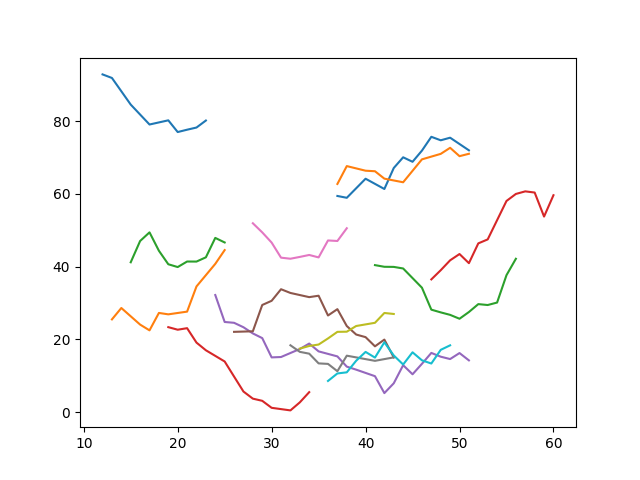

In [7]:
# plot the distance
plt.figure()
for tid, track in tracks['red'].groupby('particle'):
    plt.plot(track['frame'], track['distance'])
plt.show()

plt.figure()
for tid, track in tracks['green'].groupby('particle'):
    plt.plot(track['frame'], track['distance'])
plt.show()

In [4]:
len(processed[0])

2

In [5]:
tracks0 = processed[0][0]

In [6]:
tracks0

{'green':        frame  patch id           x           y  particle    distance
 frame                                                               
 1          1        17  226.400000  258.800000       0.0   53.600373
 2          2        17  228.500000  258.500000       0.0   54.612270
 4          4        13  230.000000  262.000000       0.0   53.037722
 5          5        10  228.250000  262.125000       0.0   53.859336
 6          6        17  232.888889  260.666667       0.0   52.940334
 7          7        14  230.045455  258.227273       0.0   56.201416
 8          8        14  229.250000  255.000000       0.0   60.200187
 9          9        16  229.666667  258.333333       0.0   58.939706
 10        10        10  228.500000  258.000000       0.0   56.269441
 12        12         5  228.515152  255.878788       0.0   47.503187
 13        13        10  231.500000  257.500000       0.0   44.096485
 1          1        19  229.500000  255.500000       1.0   50.621142
 2         